In [11]:
# Into Exp. Physics II HW9, Gabriel Bridges
# Problem 7.4
# GLB300@nyu.edu

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def LineFit(x,y):
    Xavg = np.average(x)
    Yavg = np.average(y)
    mNume = 0
    mDenom = 0
    b = 0
    for i in range (0, len(x)):
        mNume += (x[i]-Xavg)*y[i]
        mDenom += (x[i]-Xavg)*x[i]
    m = mNume/mDenom
    b = Yavg - m*Xavg
    Yfit = (x*m)+b
    return Yfit

In [14]:
def avgXY(x, y, dy):
    sigmaSqr = 0
    for n in dy:
        sigmaSqr += 1/(n**2)
    Xavg = 0
    for i in range (0, len(x)):
        Xavg += x[i]/(dy[i]**2)
    Xavg *= 1/sigmaSqr
    Yavg = 0
    for i in range (0, len(y)):
        Yavg += y[i]/(dy[i]**2)
    Yavg *= 1/sigmaSqr
    return Xavg, Yavg

In [15]:
def LineFitWt(x, y, dy):
    sigmaSqr = 0
    for n in dy:
        sigmaSqr += 1/(n**2)
    mNume = 0
    for n in range (0, len(x)):
        mNume += ((x[n]-avgXY(x, y, dy)[0])*y[n])/(dy[n]**2)
    mDenom = 0
    for n in range (0, len(x)):
        mDenom += ((x[n]-avgXY(x, y, dy)[0])*x[n])/(dy[n]**2)
    m = mNume/mDenom
    b = avgXY(x, y, dy)[1]-m*avgXY(x, y, dy)[0]
    yFit = (x*m)+b
    return yFit

In [16]:
def chiSqr(x, y, dy):
    chiSquared = 0
    for n in range(0, len(y)):
        chiSquared += ((y[n]-LineFitWt(x, y, dy)[n])/dy[n])**2
    return chiSquared

In [17]:
t, v, dv = np.loadtxt("Data.csv",skiprows=4 , unpack=True, delimiter=",")

In [20]:
plt.plot(t,LineFitWt(t, v, dv),label="Weighted Fit")
plt.plot(t,LineFit(t, v),label="Unweighted Fit")
plt.errorbar(t,v,fmt='ro',yerr=dv, ecolor='black', capsize=4, label="Data with Errorbars")

<Container object of 3 artists>

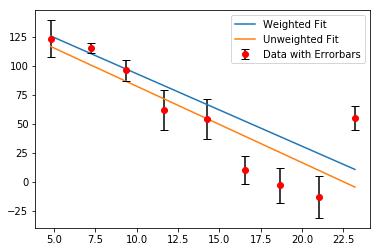

In [21]:
plt.legend()
plt.show()